In [96]:
%reset -f

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

from collections import Counter

import pandas as pd
import numpy as np
# from sklearn.preprocessing import LabelBinarizer

# from IPython.display import display
from IPython.html.widgets import interact

<font size=6 face='herculanum'>
<br><br>
Latex expression on its own line:
$$\sum_{i=1}^{N} 2^{-i} = 1$$
<br><br>
<center>versus</center>
<br><br><br>
Inline Latex expression:
$\sum_{i=1}^{N} 2^{-i} = 1$
<br><br>
</font>

In [97]:
# read in the data and display a portion of it to illustrate how it is structured

theDataFrame = pd.read_csv('conversion_data.csv')
theDataFrame.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [98]:
# evaluate the total number of sessions, total number of conversions AND average conversion rate

numSessionsMain = theDataFrame.shape[0]
print 'Total number of sessions:', numSessionsMain

numConvertedMain = sum(theDataFrame.converted==1)
print 'Total number of users converted:', numConvertedMain

conversionRateMain = 1.0*numConvertedMain/numSessionsMain
print 'Average conversion rate:', conversionRateMain

Total number of sessions: 316200
Total number of users converted: 10200
Average conversion rate: 0.0322580645161


In [99]:
# a general description of the features in the data

theDataFrame.describe(include = [np.number, np.object])

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [100]:
# general count of the distinct entries in each feature

for i in ('country', 'new_user', 'source', 'converted'):
    print
    print
    print theDataFrame[i].value_counts()



US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64


1    216744
0     99456
Name: new_user, dtype: int64


Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64


0    306000
1     10200
Name: converted, dtype: int64


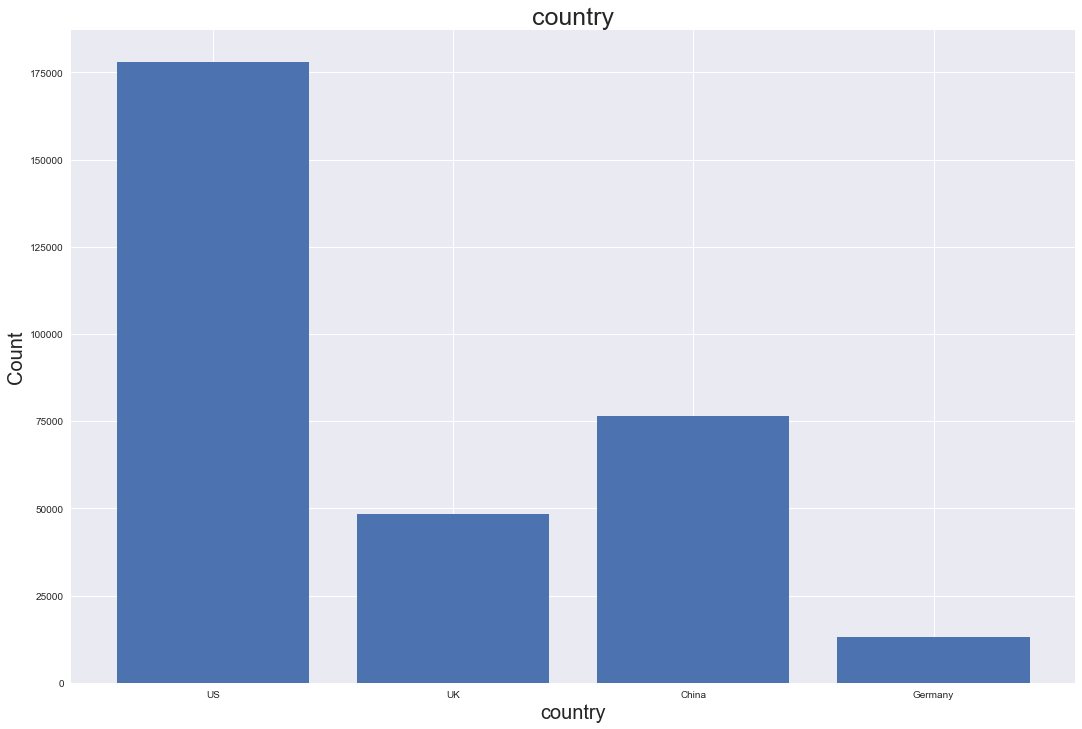

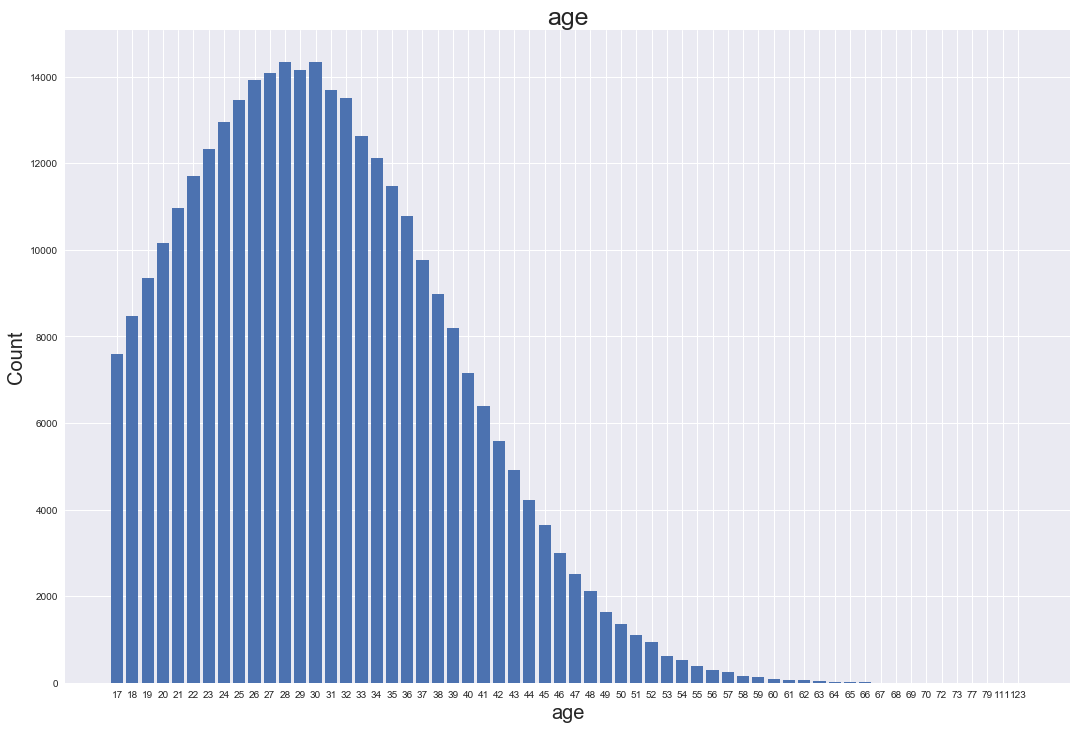

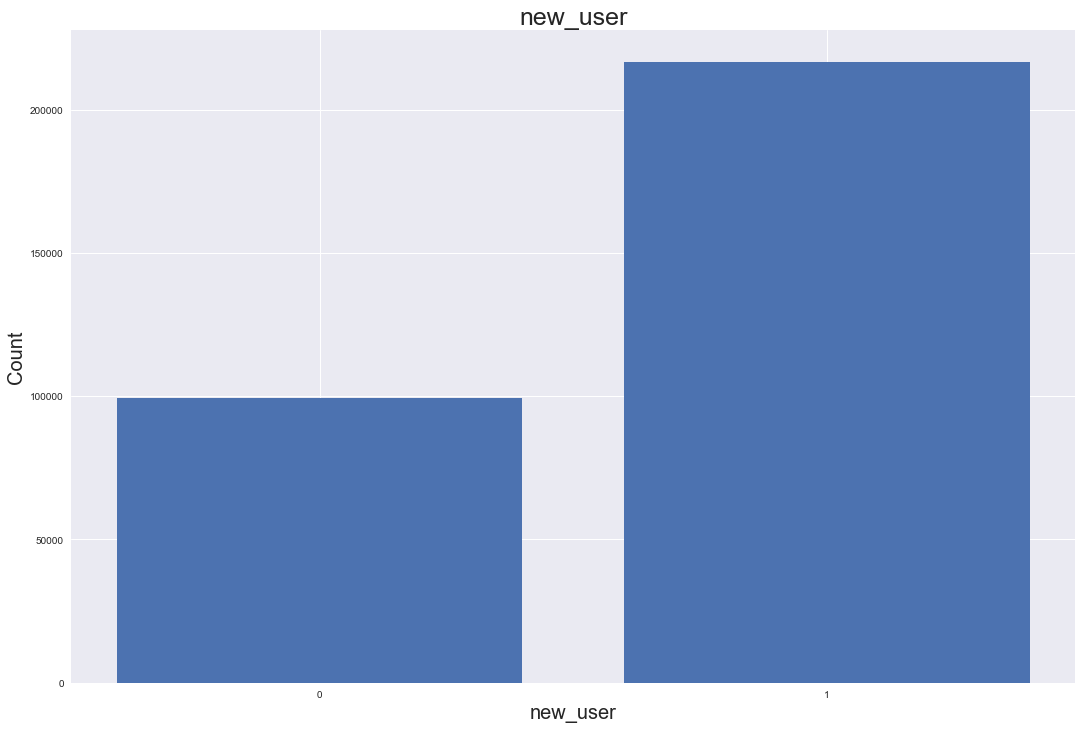

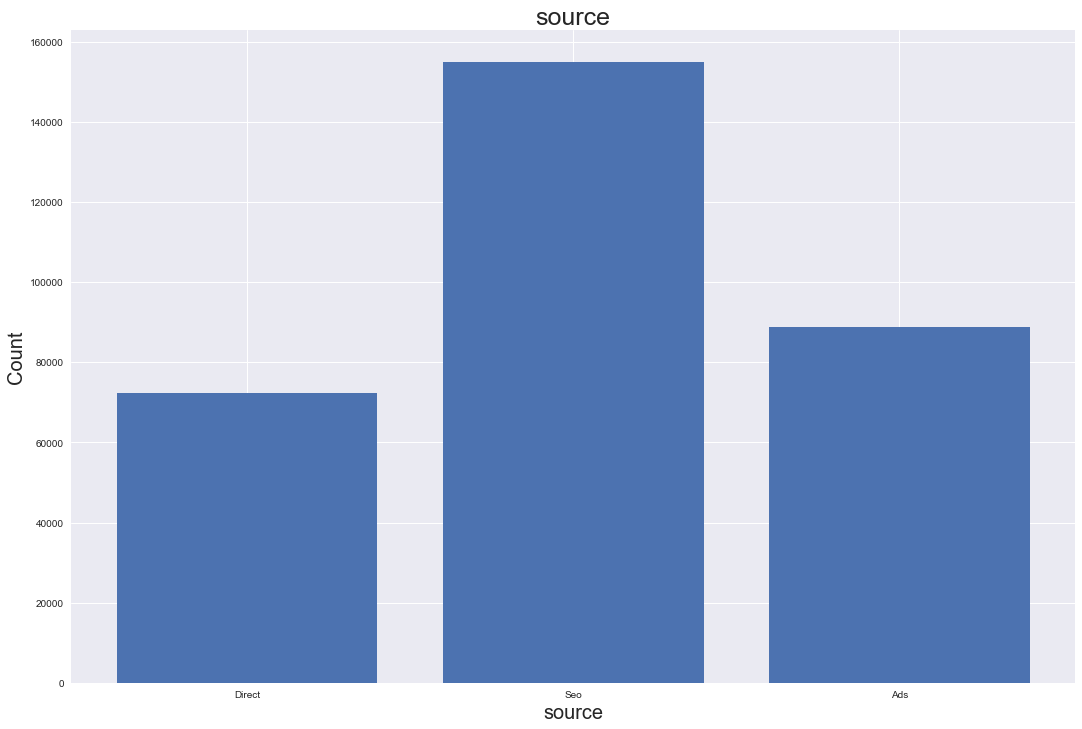

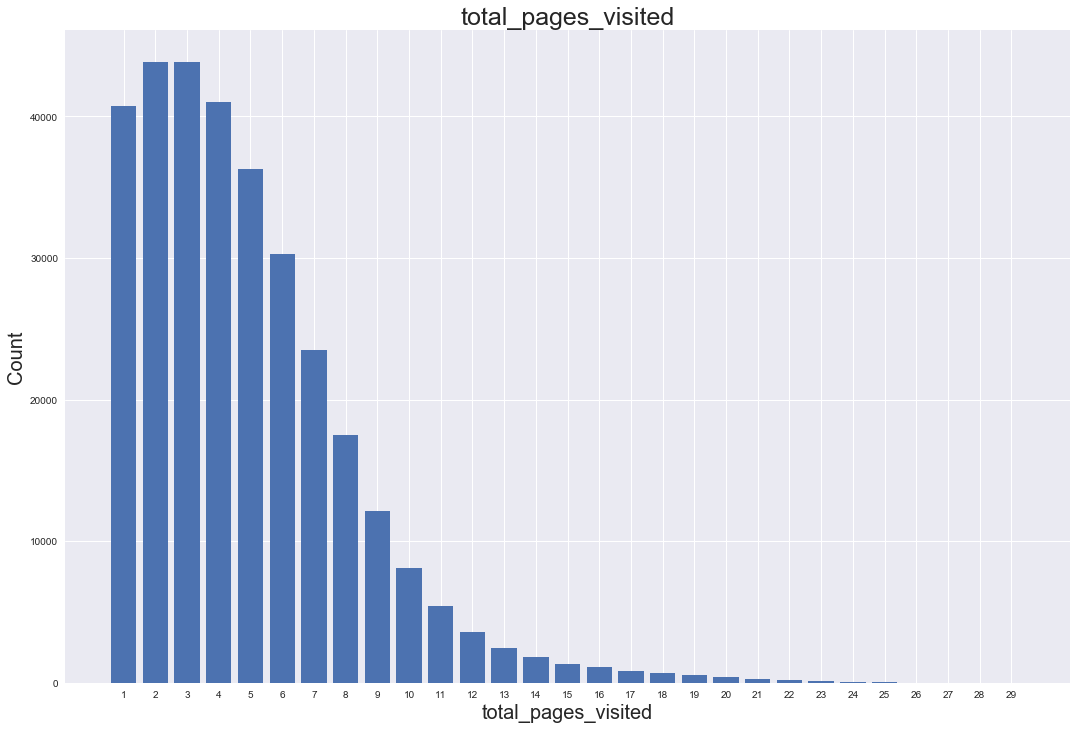

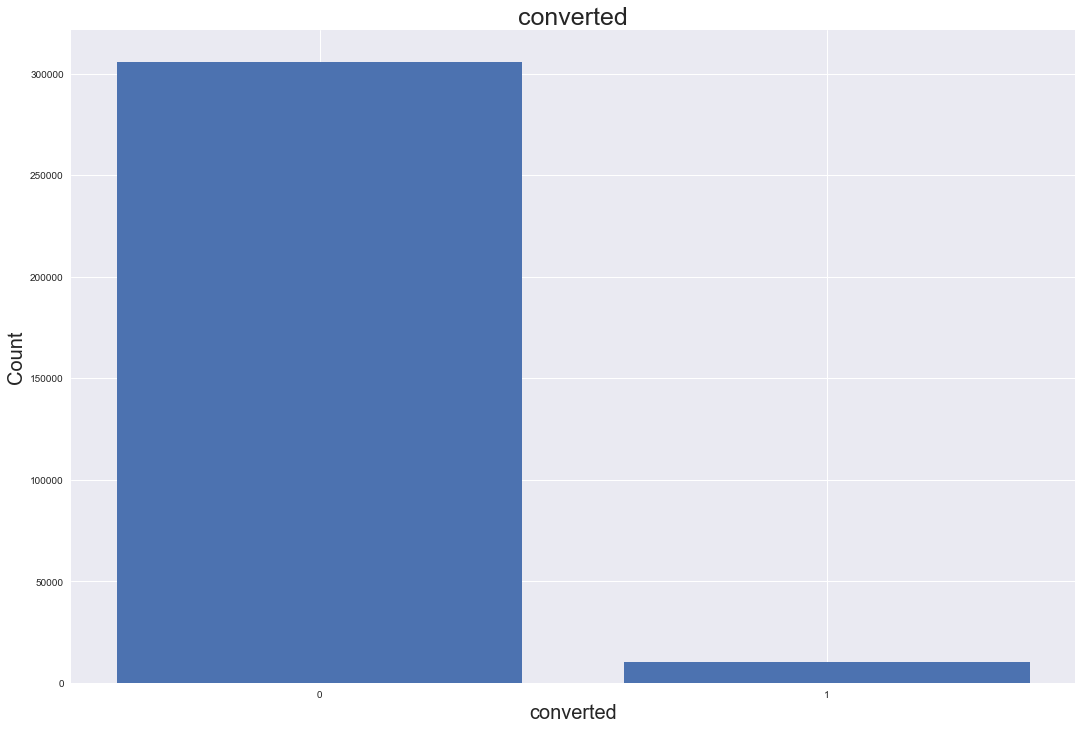

In [101]:
# plot the distributions of user counts across all features (user count by country, user count by age, e.t.c.)

# ==================================================================================================================

#PRELIMINARY INSIGHTS:

# the United States has the most users by far - more than twice the number of users from second placed China
# Germany has the fewest users - less than half of the next placed United Kingdom

# user ages lean heavily towards the younger side (most users are between 17 and 41 with mean around 29)

# most users (about 70%) are new users

# about 50% of users came to the site by clicking on search results (i.e. Seo)
    #Ads: came to the site by clicking on an advertisement
    #Seo: came to the site by clicking on search results
    #Direct: came to the site by directly typing the URL on the browser

# users tend to visit few pages before making a conversion decision (will be explored further)

# very few users eventually convert (is there a typical range for conversion rate ???)

# ==================================================================================================================

for i in theDataFrame.columns:
    aa = theDataFrame[i].value_counts(ascending=False, sort=False)
    ax = list(aa.keys())
    ay = list(aa.values)

    plt.figure(figsize=[18,12])
    plt.bar(range(len(ax)), ay, align = 'center')
    plt.xticks(range(len(ax)), ax)
    plt.title(i, fontsize = 25)
    plt.xlabel(i, fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.show()

In [102]:
# # About 75% of users visited 6 or fewer pages
# # More than 90% of users visited fewer than 9 pages

# m = theDataFrame.total_pages_visited.value_counts(sort=False)

# mk = list(m.keys())
# mv = list(m.values)

# # for j in [(str(mk[i-1]) + ' Page: ' + str(100.0*sum(mv[:i])/sum(mv))[:5]+' %') for i in range(1,len(mv)+1)]:
# #     print j

# for i in range(1,len(mv)+1):
#     if i <= 1:
#         print str(mk[i-1])+' Page:', str(100.0*sum(mv[:i])/sum(mv))[:5], '%'
#     else:
#         print str(mk[i-1])+' Pages:', str(100.0*sum(mv[:i])/sum(mv))[:5], '%'

In [103]:
# # Most users visited 1 to 5 pages

# for j in [(str(i+1) + ' Page: ' + str(100.0*mv[i]/sum(mv))[:5] + '%') for i in range(len(mv))]:
#     print j

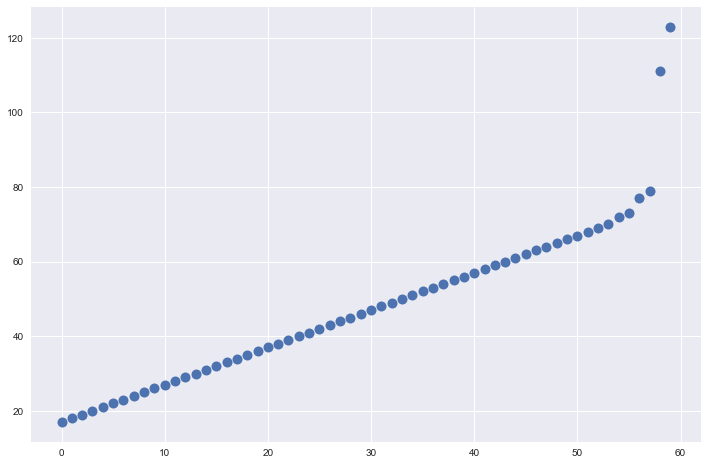

In [104]:
# explore the range of user ages
# looks like there are outliers (111 and 123) which may be as a result of users just messing around

yy = list(set(theDataFrame.age))
xx = range(len(yy))

plt.figure(figsize=[12,8])
plt.plot(xx, yy, '.', markersize=20)
plt.show()

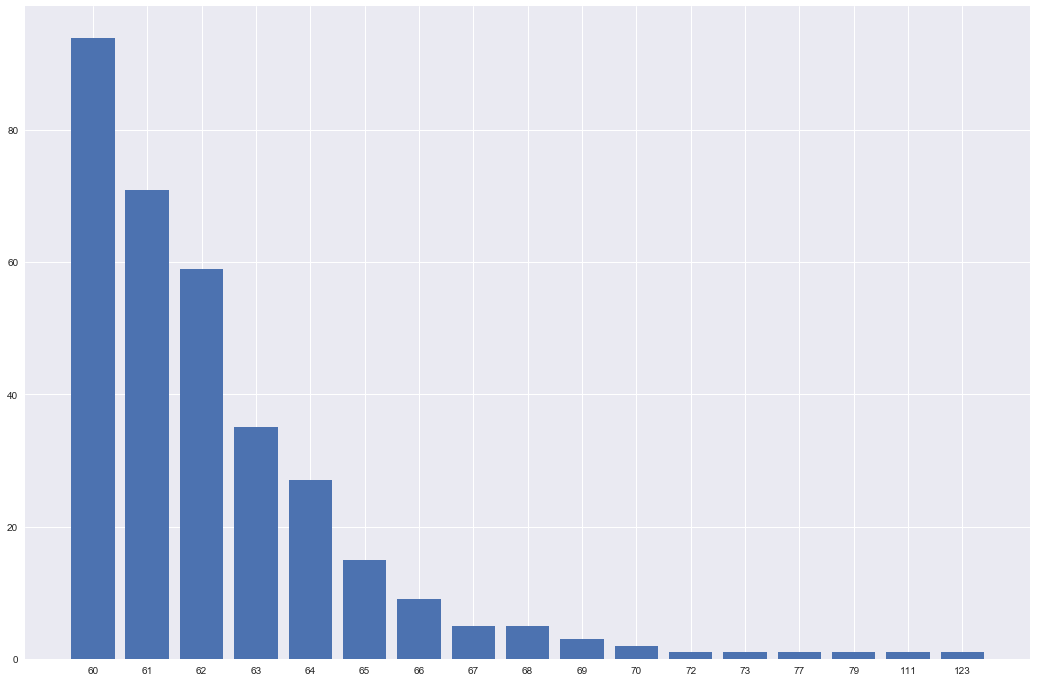

In [105]:
# further exploration of user distribution of users by age (for user older than 60)

dfSenior = theDataFrame[theDataFrame.age >= 60]
aa = dfSenior.age.value_counts(ascending=False, sort=False)
ax = list(aa.keys())
ay = list(aa.values)

plt.figure(figsize=[18,12])
plt.bar(range(len(ax)), ay, align = 'center')
plt.xticks(range(len(ax)), ax)
plt.show()

In [106]:
# # given an age range, this function plots the distribution of users' ages over that range

# def plotAgeCount(lowerLim,upperLim):
#     theAge=[]
#     theCount=[]
#     for i in range(lowerLim,upperLim):
#         #print i, ':', theDataFrame.age[theDataFrame.age.values > i].shape[0]
#         theAge.append(i)
#         theCount.append(theDataFrame.age[theDataFrame.age.values >= i].shape[0])
#     plt.figure(figsize=(12,8))
#     plt.plot(theAge,theCount)
#     plt.show()

# plotAgeCount(50,123)

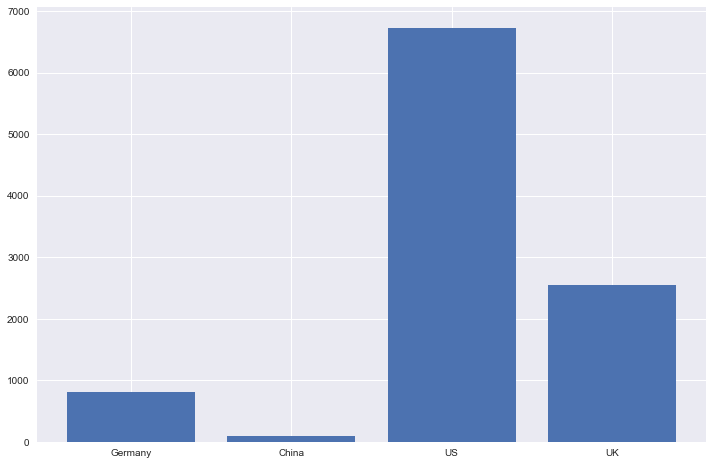

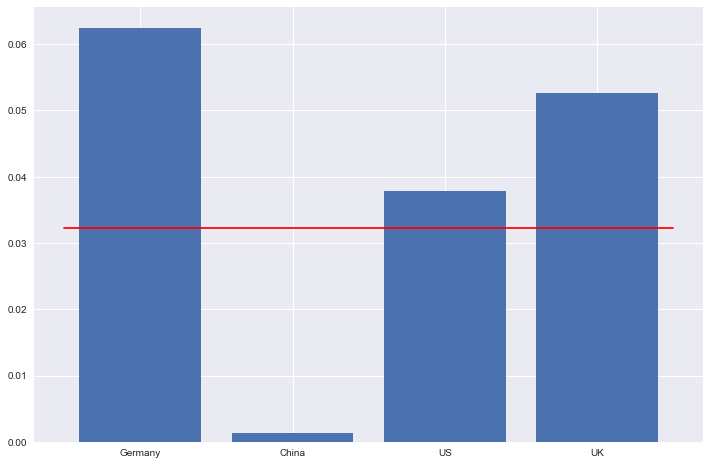

In [107]:
# conversion rate by country

theCountries = list(set(theDataFrame.country))

ceCountries = []
ceNumSessions = []
ceConverted = []
ceConversionRate = []

for countryy in theCountries:
    ceCountries.append(countryy)
    cePays = theDataFrame[theDataFrame.country==countryy]
    numSessions = cePays.shape[0]
    ceNumSessions.append(numSessions)
    numConverted = sum(cePays.converted==1)
    ceConverted.append(numConverted)
    conversionRate = 1.0*numConverted/numSessions        
    ceConversionRate.append(conversionRate)

# ===========================================================================================

plt.figure(figsize=[12,8])
plt.bar(range(len(ceCountries)), ceConverted, align = 'center')
plt.xticks(range(len(ceCountries)), ceCountries)
plt.show()

# ===========================================================================================

plt.figure(figsize=[12,8])
plt.bar(range(len(ceCountries)), ceConversionRate, align = 'center')

mm = [i-0.5 for i in range(len(theCountries)+1)]
plt.plot([mm[0], mm[-1]],[conversionRateMain,conversionRateMain], 'r') # superimpose plot of overall conversion rate

plt.xticks(range(len(ceCountries)), ceCountries)
plt.show()

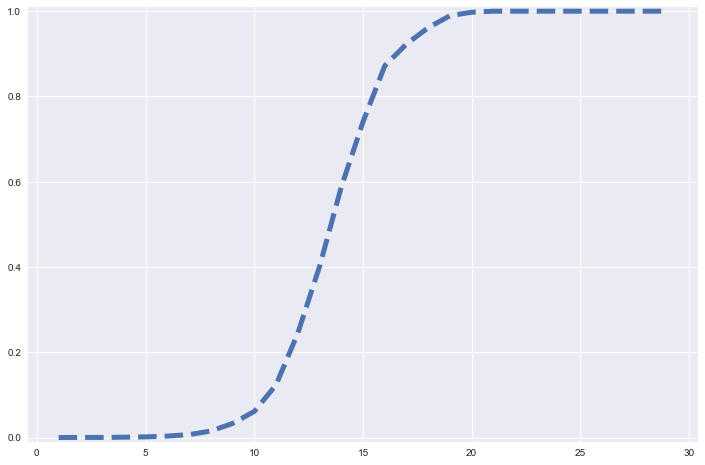

In [108]:
# how does the number of pages visited vary with conversion rate ???

# looks like users who visited 20 or more pages typically convert...

setNumPagesVisited = set(theDataFrame.total_pages_visited)

listNumPagesVisited = []
listConversionRate = []

for i in setNumPagesVisited:
    aa = theDataFrame[theDataFrame.total_pages_visited==i]
    numSessions = aa.shape[0]
    numConverted = sum(aa.converted==1)
    conversionRate = 1.0*numConverted/numSessions 
    listNumPagesVisited.append(i)
    listConversionRate.append(conversionRate)
    
plt.figure(figsize=[12,8])
plt.plot(listNumPagesVisited, listConversionRate, '--', linewidth = 5)
plt.ylim([-0.01,1.01])
plt.show()

In [109]:
# this function plots the distributions of converted users from a given country across features
# plots of distributions of converted users across country and conversion are ignored

def plotConvDataCountry(aCountry):
    df = theDataFrame[(theDataFrame.country == aCountry) & (theDataFrame.converted == 1)]
    for i in [j for j in df.columns if (j != 'country') and (j != 'converted')]:
        m = Counter(df[i])
        plt.figure(figsize=[16,12])
        plt.bar(range(len(m.keys())), m.values())
        plt.xticks(range(len(m.keys())), m.keys(), fontsize = 13)
        plt.xlabel(i, fontsize = 20)
        plt.ylabel('Count', fontsize = 20)
        plt.title(i+' (' + aCountry + ')', fontsize = 25)
        plt.show()

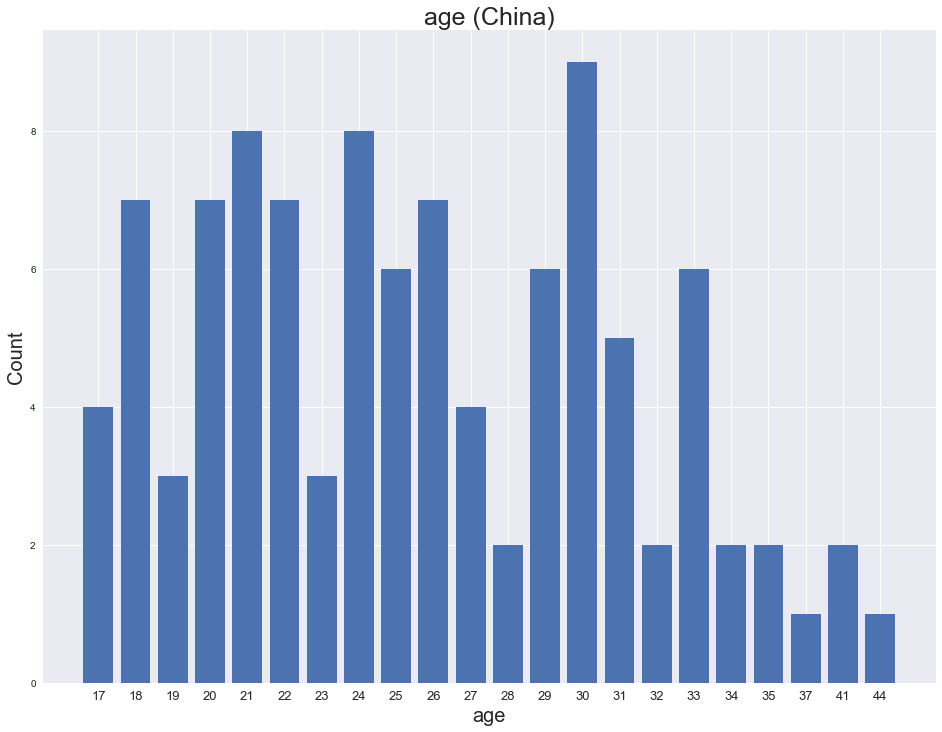

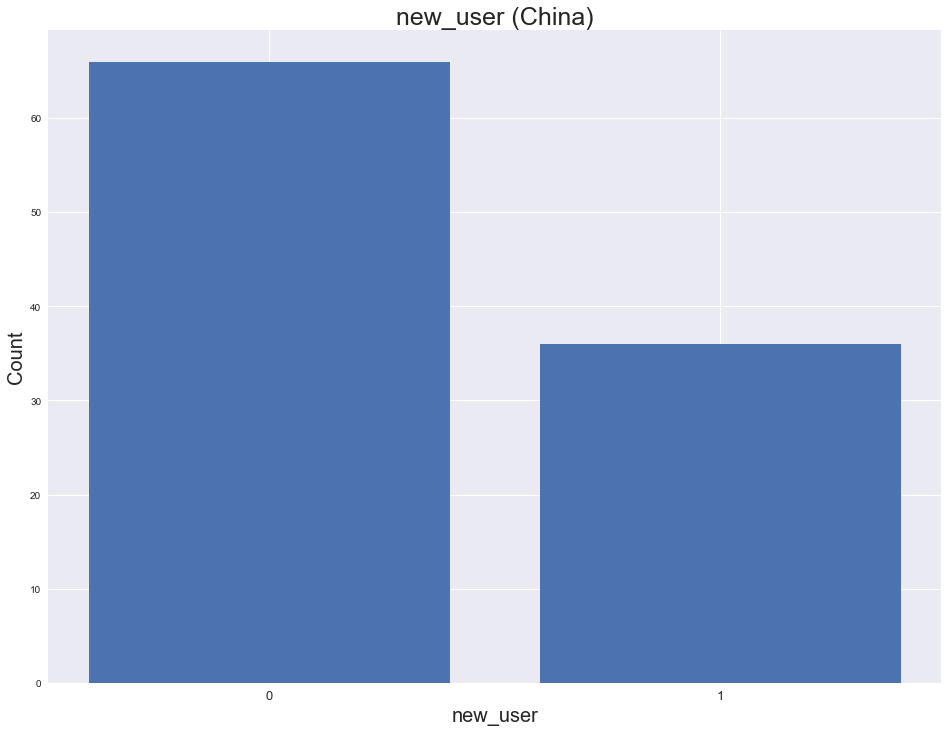

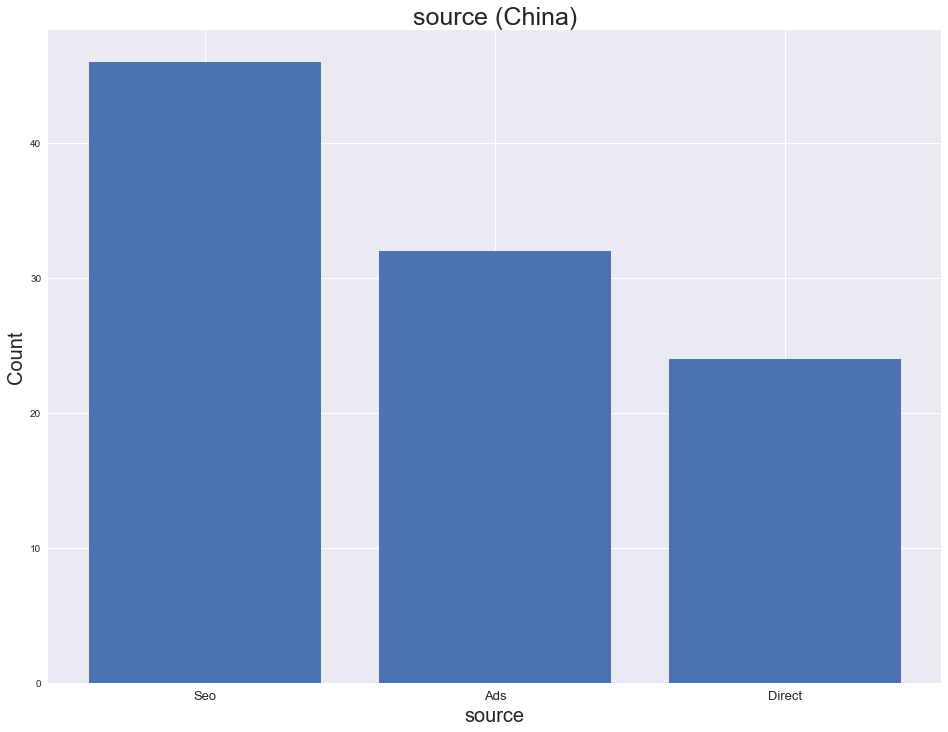

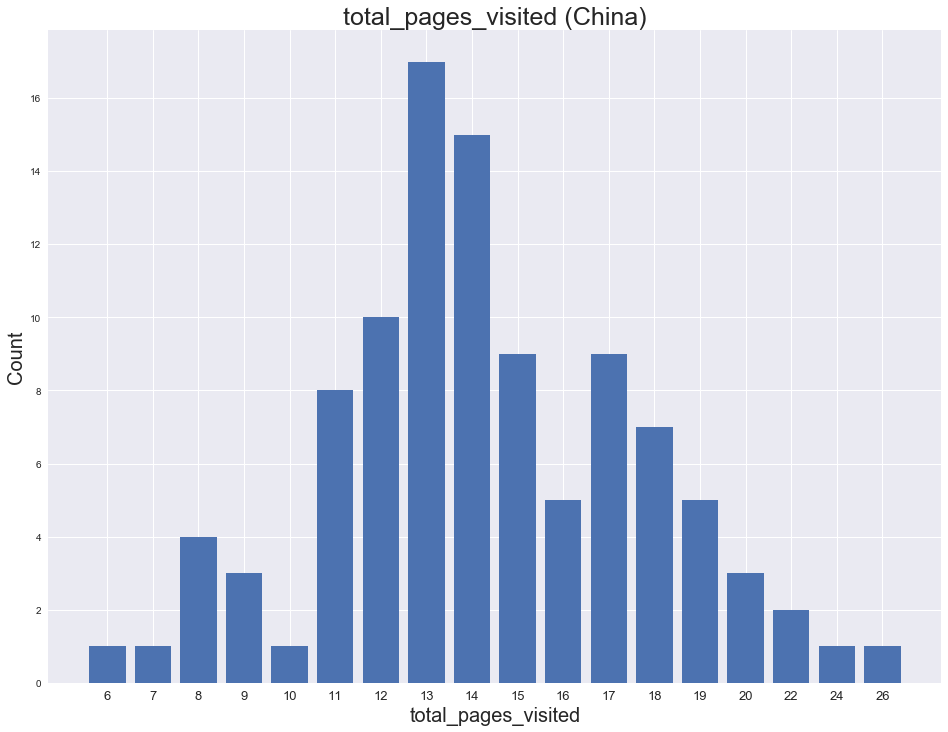

In [123]:
plotConvDataCountry('China')

In [111]:
# # this interactive widget allows us to select a feature across which the distribution of converted users is plotted

# listCountries = list(set(theDataFrame.country))
# interact(plotConvDataCountry, aCountry = listCountries);

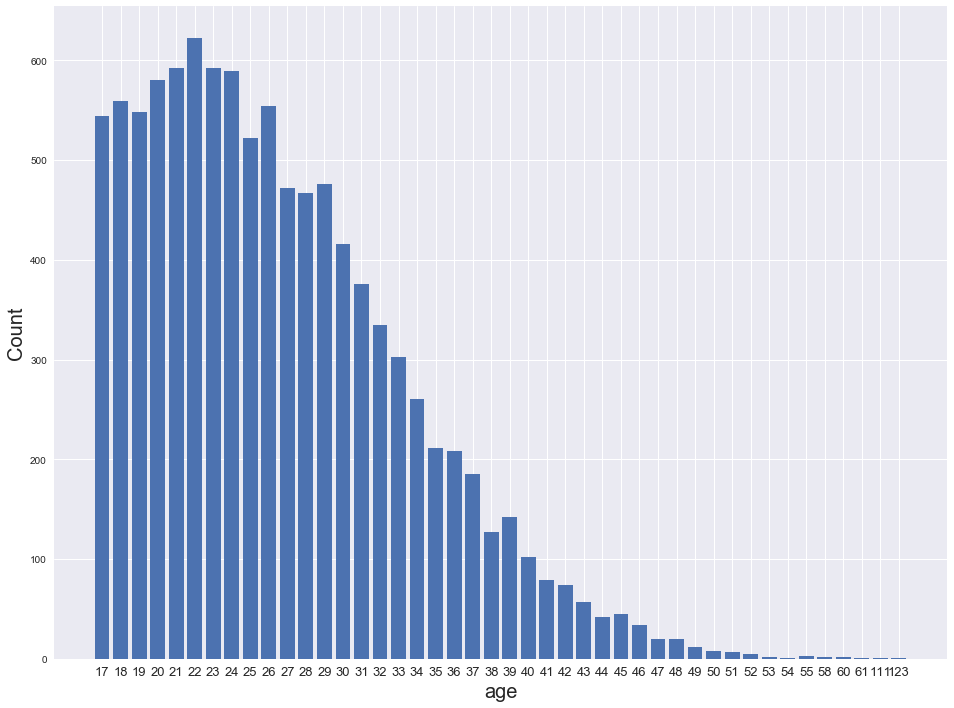

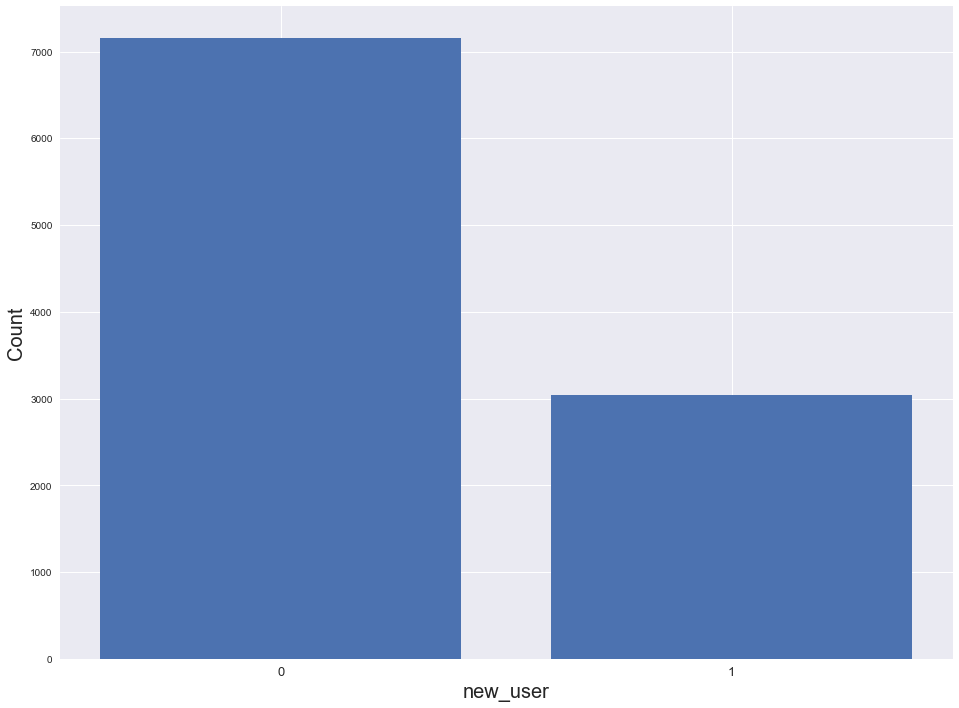

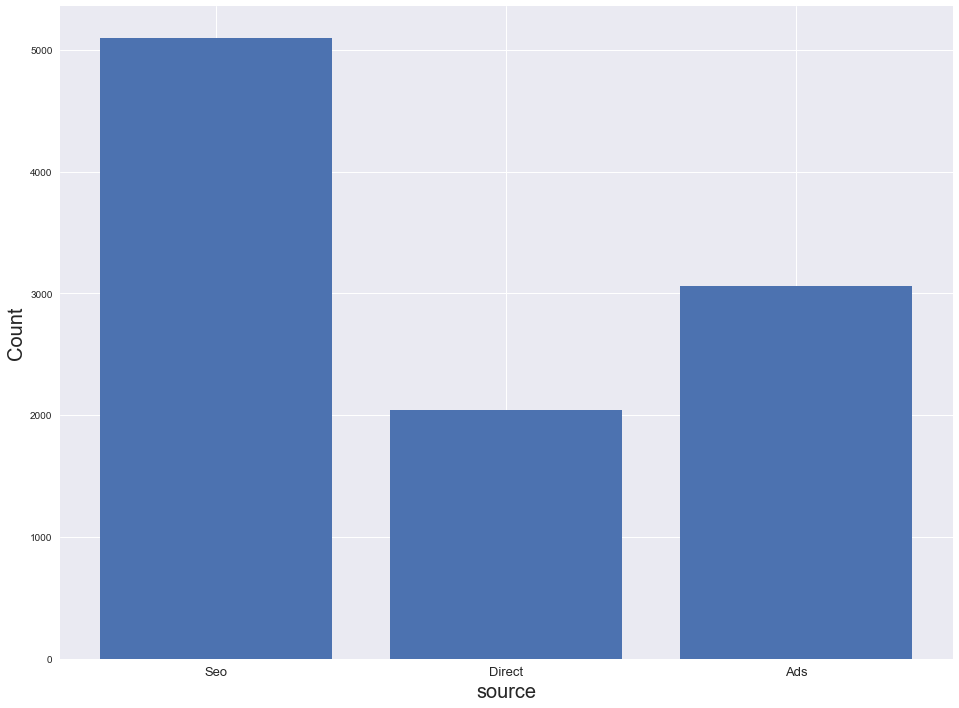

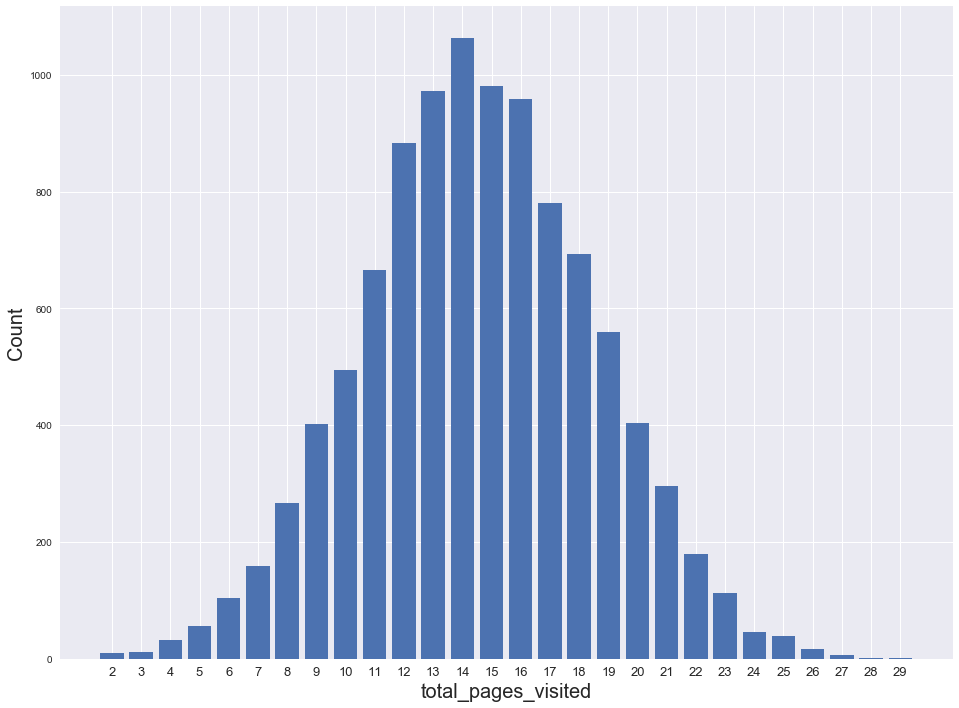

In [112]:
# plots of the distributions of all converted users across features
# plots of distributions of converted users across country and conversion are ignored

df = theDataFrame[theDataFrame.converted == 1]
for i in [j for j in df.columns if (j != 'country') and (j != 'converted')]:
    m = Counter(df[i])
    plt.figure(figsize=[16,12])
    plt.bar(range(len(m.keys())), m.values())
    plt.xticks(range(len(m.keys())), m.keys(), fontsize = 13)
    plt.xlabel(i, fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.show()

In [121]:
for i in list(setNumPagesVisited):
    mm = theDataFrame[theDataFrame.total_pages_visited == i]
    x = mm[mm.converted == 1].shape[0]
    y = mm[mm.converted == 0].shape[0]
    print 'Users who visited ' + str(i) + ' pages:', [x, y, 100.0*x/(x+y)]

Users who visited 1 pages: [0, 40739, 0.0]
Users who visited 2 pages: [10, 43858, 0.022795659706391903]
Users who visited 3 pages: [11, 43818, 0.025097538159665974]
Users who visited 4 pages: [32, 41014, 0.07796131169906934]
Users who visited 5 pages: [57, 36251, 0.15699019499834746]
Users who visited 6 pages: [104, 30157, 0.3436766795545422]
Users who visited 7 pages: [159, 23329, 0.676941416893733]
Users who visited 8 pages: [267, 17255, 1.5237986531217897]
Users who visited 9 pages: [402, 11755, 3.306736859422555]
Users who visited 10 pages: [494, 7580, 6.118404756006936]
Users who visited 11 pages: [666, 4728, 12.347052280311457]
Users who visited 12 pages: [884, 2731, 24.4536652835408]
Users who visited 13 pages: [972, 1453, 40.08247422680412]
Users who visited 14 pages: [1064, 747, 58.75207067918277]
Users who visited 15 pages: [981, 344, 74.0377358490566]
Users who visited 16 pages: [959, 141, 87.18181818181819]
Users who visited 17 pages: [780, 65, 92.3076923076923]
Users who v

['Seo', 5100, 155040, 3.289473684210526]
['Ads', 3060, 88740, 3.4482758620689653]
['Direct', 2040, 72420, 2.816901408450704]


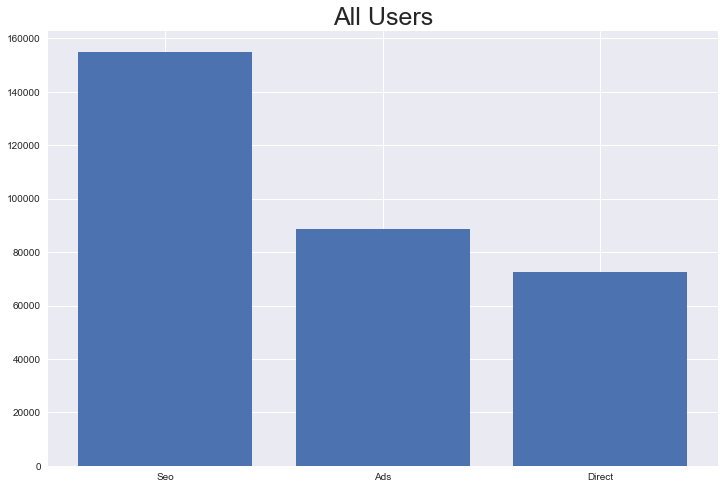

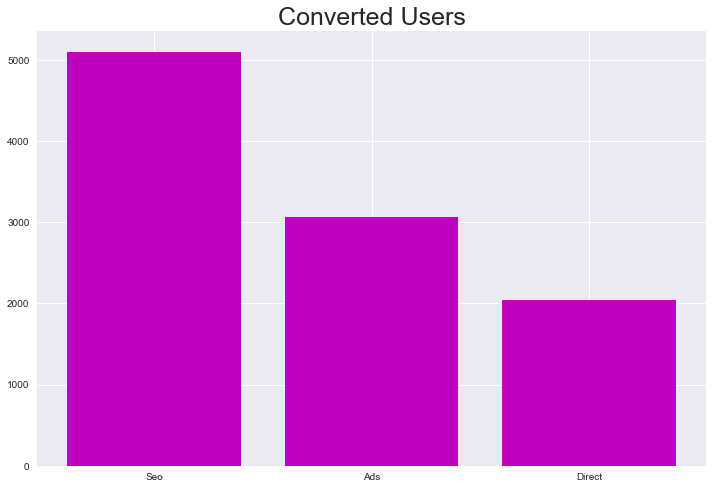

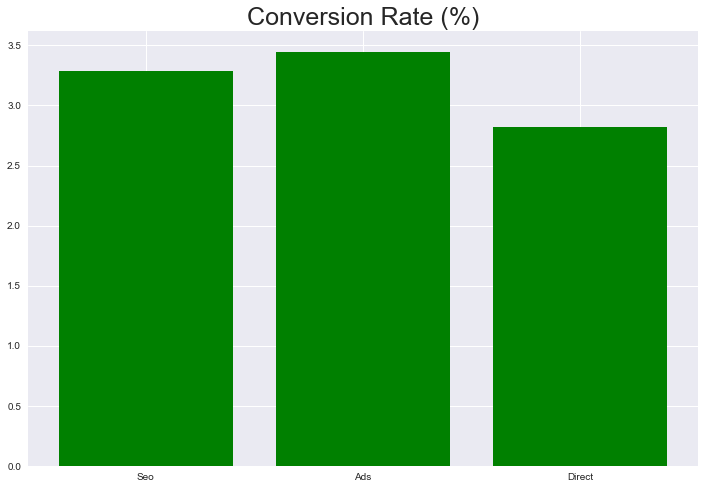

In [168]:
# conversion rate by source (sources are search results, clicking on ads and typing URL direct into browser)

s = [i for i in set(theDataFrame.source)]
totalUsers = []
convUsers = []
convRate = []

for i in s:
    mm = theDataFrame[theDataFrame.source == i]
    tu = mm.shape[0]
    cu = mm[mm.converted == 1].shape[0]
    cr = 100.0*cu/tu
    totalUsers.append(tu)
    convUsers.append(cu)
    convRate.append(cr)
    print [i, cu, tu, cr]
    
plt.figure(figsize=[12,8])
plt.bar(range(len(s)), totalUsers, align = 'center')
plt.xticks(range(len(s)),s)
plt.title('All Users', fontsize=25)
plt.show()

plt.figure(figsize=[12,8])
plt.bar(range(len(s)), convUsers, align = 'center', color='m')
plt.xticks(range(len(s)),s)
plt.title('Converted Users', fontsize=25)
plt.show()

plt.figure(figsize=[12,8])
plt.bar(range(len(s)), convRate, align = 'center', color='g')
plt.xticks(range(len(s)),s)
plt.title('Conversion Rate (%)', fontsize=25)
plt.show()

[1, 0, 40739, 0.0]
[2, 10, 43868, 0.022795659706391903]
[3, 11, 43829, 0.025097538159665974]
[4, 32, 41046, 0.07796131169906934]
[5, 57, 36308, 0.15699019499834746]
[6, 104, 30261, 0.3436766795545422]
[7, 159, 23488, 0.676941416893733]
[8, 267, 17522, 1.5237986531217897]
[9, 402, 12157, 3.306736859422555]
[10, 494, 8074, 6.118404756006936]
[11, 666, 5394, 12.347052280311457]
[12, 884, 3615, 24.4536652835408]
[13, 972, 2425, 40.08247422680412]
[14, 1064, 1811, 58.75207067918277]
[15, 981, 1325, 74.0377358490566]
[16, 959, 1100, 87.18181818181819]
[17, 780, 845, 92.3076923076923]
[18, 694, 722, 96.1218836565097]
[19, 559, 565, 98.93805309734513]
[20, 404, 405, 99.75308641975309]
[21, 296, 296, 100.0]
[22, 180, 180, 100.0]
[23, 113, 113, 100.0]
[24, 46, 46, 100.0]
[25, 39, 39, 100.0]
[26, 17, 17, 100.0]
[27, 7, 7, 100.0]
[28, 1, 1, 100.0]
[29, 2, 2, 100.0]


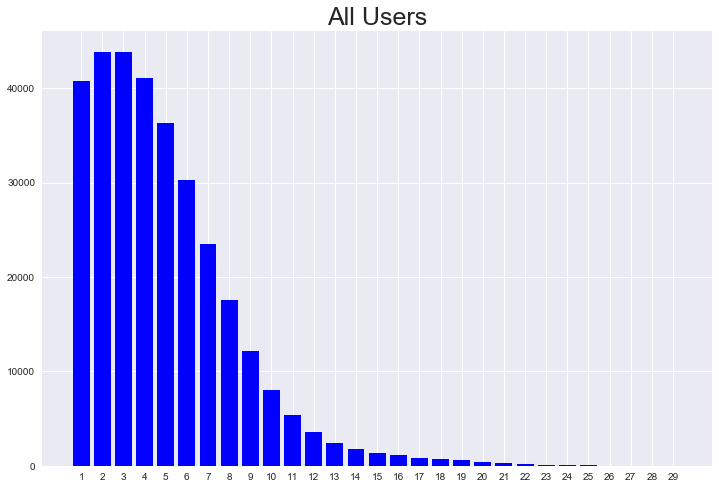

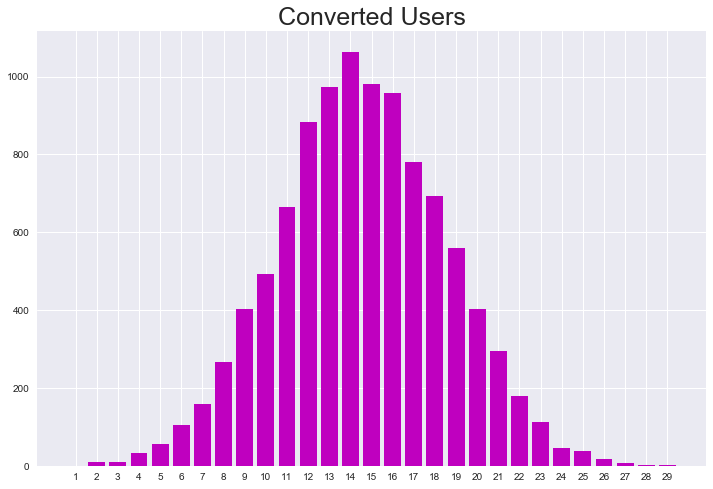

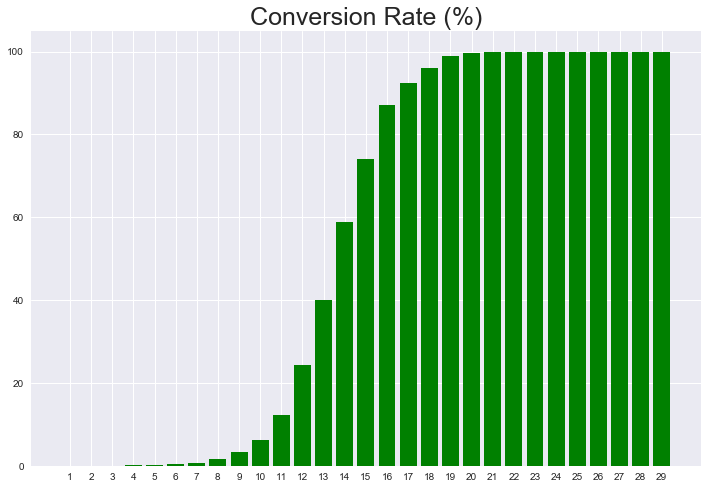

In [176]:
# conversion rate by number of pages visited

s = [i for i in set(theDataFrame.total_pages_visited)]
totalUsers = []
convUsers = []
convRate = []
numPgs = []

for i in s:
    mm = theDataFrame[theDataFrame.total_pages_visited == i]
    tu = mm.shape[0]
    cu = mm[mm.converted == 1].shape[0]
    cr = 100.0*cu/tu
    totalUsers.append(tu)
    convUsers.append(cu)
    convRate.append(cr)
    numPgs.append(i)
    print [i, cu, tu, cr]
    
plt.figure(figsize=[12,8])
plt.bar(range(len(s)), totalUsers, align = 'center', color='b')
plt.xticks(range(len(s)),s)
plt.title('All Users', fontsize=25)
plt.show()

plt.figure(figsize=[12,8])
plt.bar(range(len(s)), convUsers, align = 'center', color='m')
plt.xticks(range(len(s)),s)
plt.title('Converted Users', fontsize=25)
plt.show()

plt.figure(figsize=[12,8])
plt.bar(range(len(s)), convRate, align = 'center', color='g')
plt.xticks(range(len(s)),s)
plt.title('Conversion Rate (%)', fontsize=25)
plt.show()

[0, 7161, 99456, 7.200168918918919]
[1, 3039, 216744, 1.4021149374377146]


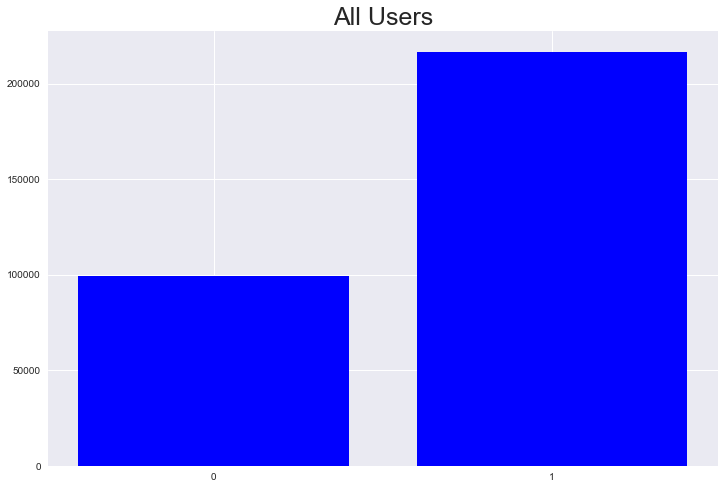

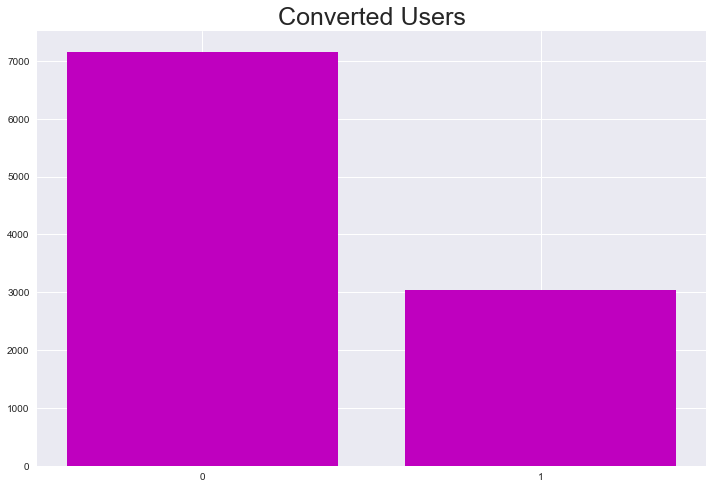

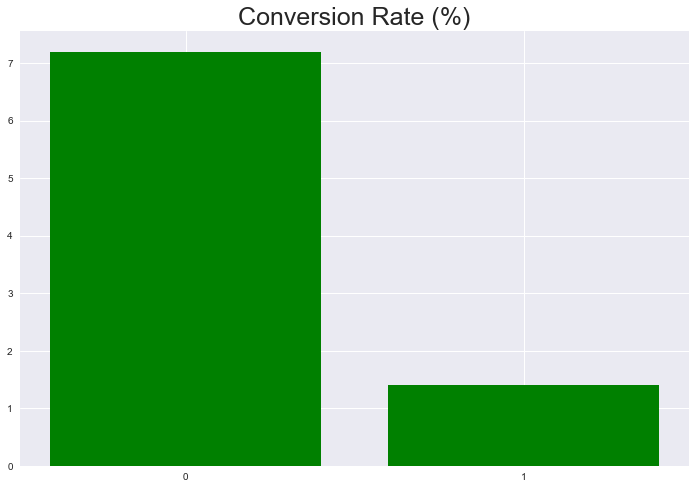

In [177]:
# conversion rate by "new user" status

s = [i for i in set(theDataFrame.new_user)]
totalUsers = []
convUsers = []
convRate = []
numPgs = []

for i in s:
    mm = theDataFrame[theDataFrame.new_user == i]
    tu = mm.shape[0]
    cu = mm[mm.converted == 1].shape[0]
    cr = 100.0*cu/tu
    totalUsers.append(tu)
    convUsers.append(cu)
    convRate.append(cr)
    numPgs.append(i)
    print [i, cu, tu, cr]
    
plt.figure(figsize=[12,8])
plt.bar(range(len(s)), totalUsers, align = 'center', color='b')
plt.xticks(range(len(s)),s)
plt.title('All Users', fontsize=25)
plt.show()

plt.figure(figsize=[12,8])
plt.bar(range(len(s)), convUsers, align = 'center', color='m')
plt.xticks(range(len(s)),s)
plt.title('Converted Users', fontsize=25)
plt.show()

plt.figure(figsize=[12,8])
plt.bar(range(len(s)), convRate, align = 'center', color='g')
plt.xticks(range(len(s)),s)
plt.title('Conversion Rate (%)', fontsize=25)
plt.show()

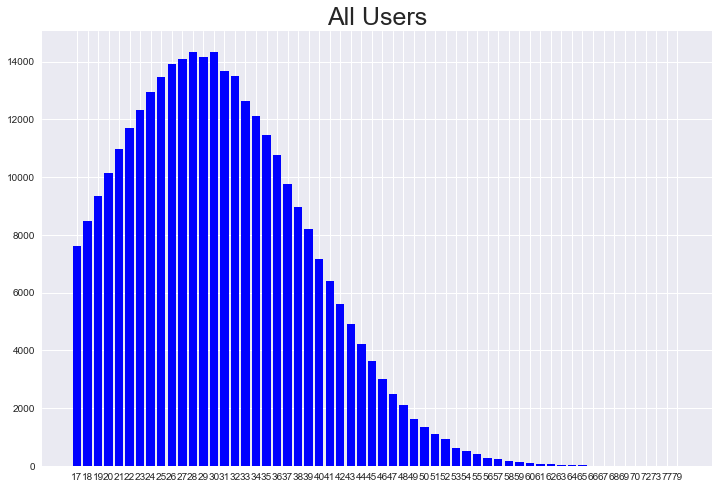

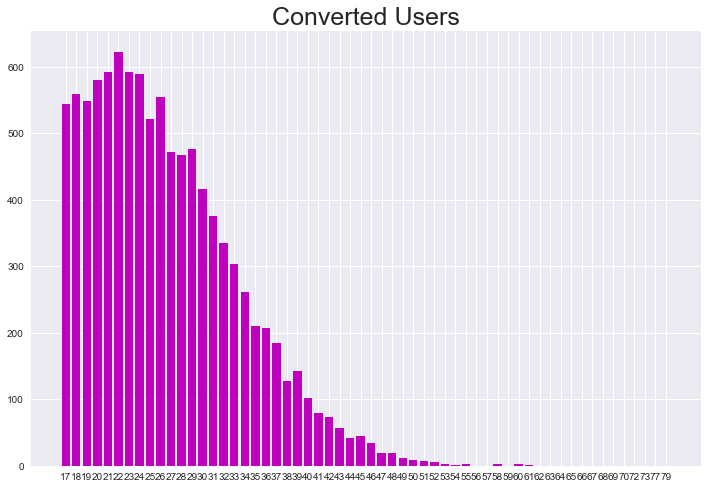

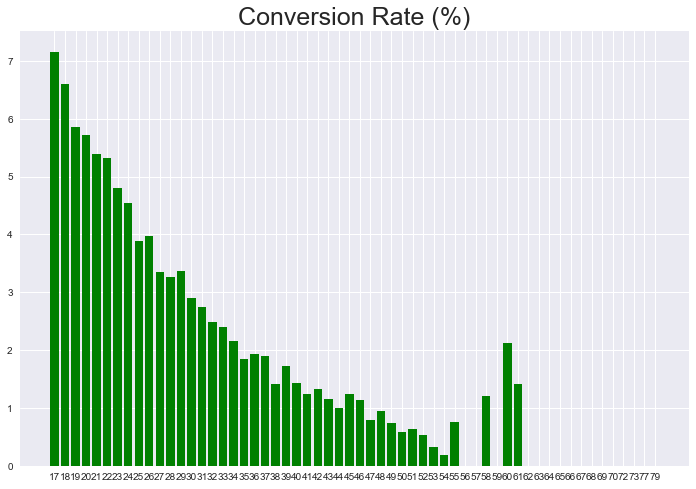

In [184]:
# conversion rate by age

# s = [i for i in set(theDataFrame.age)]

dfAgeMod = theDataFrame[theDataFrame.age <= 100]

s = [i for i in set(dfAgeMod.age)]
totalUsers = []
convUsers = []
convRate = []
numPgs = []

for i in s:
    mm = theDataFrame[theDataFrame.age == i]
    tu = mm.shape[0]
    cu = mm[mm.converted == 1].shape[0]
    cr = 100.0*cu/tu
    totalUsers.append(tu)
    convUsers.append(cu)
    convRate.append(cr)
    numPgs.append(i)
#     print [i, cu, tu, cr]
    
plt.figure(figsize=[12,8])
plt.bar(range(len(s)), totalUsers, align = 'center', color='b')
plt.xticks(range(len(s)),s)
plt.title('All Users', fontsize=25)
plt.show()

plt.figure(figsize=[12,8])
plt.bar(range(len(s)), convUsers, align = 'center', color='m')
plt.xticks(range(len(s)),s)
plt.title('Converted Users', fontsize=25)
plt.show()

plt.figure(figsize=[12,8])
plt.bar(range(len(s)), convRate, align = 'center', color='g')
plt.xticks(range(len(s)),s)
plt.title('Conversion Rate (%)', fontsize=25)
plt.show()